<a href="https://colab.research.google.com/github/pranay8297/Stable-Diffusion-Experiments/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [3]:
from ipdb import set_trace as st
import torch
import numpy as np

from torch import nn
from torch.functional import F

In [4]:
 # nn.Module
# nn.ModuleList
# nn.SequentialModel

In [5]:
data = torch.randn(300, 4)
y = data[:, 0] * 4 + data[:, 1]*5 + data[:, 2]*2 + data[:, 3]*1.2 + 2
y = y +  torch.tensor(np.linspace(-1, 1, data.shape[0])) * torch.std(y)/3
y = y.to(torch.float32)
x = data.clone()
orig_y = y.clone()

In [6]:
class Optimizer():
    def __init__(self, parameters, lr):
      self.params, self.lr = list(parameters), lr

    def step(self):
      with torch.no_grad():
          for param in self.params:
              param -= self.lr*param.grad

    def zero_grad(self):
        for param in self.params:
            param.grad.data.zero_()

In [7]:
lr = 0.01
model = nn.Sequential(nn.Linear(4, 2), nn.ReLU(), nn.Linear(2, 1))
opt = Optimizer(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
def fit():
    for i in range(2000):
        yhat = model(x)
        loss = loss_fn(y, yhat.squeeze())
        loss.backward()
        opt.step()
        opt.zero_grad()
        if ((i + 1) % 500 == 0):
            print(loss.item())

fit()

2.737281322479248
2.7372758388519287
2.737271785736084
2.7372684478759766


# Dataset

In [8]:
# Dataset - Object where we can index and get x and y of that index
class Dataset():

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return self.x.shape[0]

In [9]:
lr = 0.01
model = nn.Sequential(nn.Linear(4, 2), nn.ReLU(), nn.Linear(2, 1))
opt = Optimizer(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
bs = 32
ds = Dataset(x, y)
def fit():
    # Lets do with batches this time.
    for i in range(2001):
        losses = []

        for idx in range(0, len(ds), bs):
            x, y = ds[idx : min((idx + bs), len(ds))]
            yhat = model(x)
            loss = loss_fn(y, yhat.squeeze())
            loss.backward()
            opt.step()
            opt.zero_grad()
            losses.append(loss.item())

        if ((i) % 200 == 0):
            print(f"Mean Loss for epoch : {i + 1} is : {np.mean(losses):.2f}")

fit()

Mean Loss for epoch : 1 is : 51.07
Mean Loss for epoch : 201 is : 2.36
Mean Loss for epoch : 401 is : 2.17
Mean Loss for epoch : 601 is : 2.12
Mean Loss for epoch : 801 is : 2.10
Mean Loss for epoch : 1001 is : 2.08
Mean Loss for epoch : 1201 is : 2.07
Mean Loss for epoch : 1401 is : 2.06
Mean Loss for epoch : 1601 is : 2.06
Mean Loss for epoch : 1801 is : 2.08
Mean Loss for epoch : 2001 is : 2.08


In [10]:
class Dataloader():
    def __init__(self, ds, bs):
        self.ds, self.bs = ds, bs
    def __iter__(self):
        for idx in range(0, len(self.ds), self.bs): yield self.ds[idx: min(len(self.ds), idx + self.bs)]

In [11]:
ds = Dataset(x, y)
dl = Dataloader(ds, 32)

In [12]:
next(iter(dl))

(tensor([[-1.3364,  0.1319, -0.5889,  1.5598],
         [ 0.9475,  0.9965,  1.7420, -1.1136],
         [-1.8596,  0.5741,  0.2268, -0.3689],
         [ 1.7526, -0.7104, -0.2808,  0.6842],
         [-0.0155,  0.4945, -0.3815, -1.0076],
         [-0.3246,  0.3486,  1.1212, -0.6414],
         [-1.3081, -1.0966,  0.2265,  1.2214],
         [-0.3021, -0.8100,  0.0595,  1.1766],
         [-1.3961,  0.3857, -1.4688,  0.0611],
         [-0.1654, -0.7675, -0.7918,  0.5665],
         [-0.4406,  0.0741,  0.1801,  0.2138],
         [-1.7878, -0.9283,  0.2279, -0.9137],
         [-0.6131, -0.4105,  0.6868, -0.2743],
         [ 0.2821,  0.0527, -0.4324, -0.5370],
         [-1.4185,  1.2318, -0.6266, -0.4067],
         [-0.4360,  1.8947,  0.2096,  0.7282],
         [ 1.0738, -1.5148, -1.6040,  0.5352],
         [ 0.4746,  1.5498, -1.1140, -0.7238],
         [-0.0468,  0.1105,  1.3427, -0.2491],
         [ 0.2358,  1.6073,  1.1801,  2.5731],
         [ 0.2350, -1.5207,  0.0968, -0.2228],
         [ 0.

In [13]:
lr = 0.01
model = nn.Sequential(nn.Linear(4, 2), nn.ReLU(), nn.Linear(2, 1))
opt = Optimizer(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
bs = 32
ds = Dataset(x, y)
dl = Dataloader(ds, 32)

def fit():
    # Lets do with batches this time.
    for i in range(1001):
        losses = []
        for x, y in dl:
            yhat = model(x)
            loss = loss_fn(y, yhat.squeeze())
            loss.backward()
            opt.step()
            opt.zero_grad()
            losses.append(loss.item())

        if ((i) % 100 == 0):
            print(f"Mean Loss for epoch : {i + 1} is : {np.mean(losses):.2f}")

fit()

Mean Loss for epoch : 1 is : 49.07
Mean Loss for epoch : 101 is : 2.86
Mean Loss for epoch : 201 is : 2.37
Mean Loss for epoch : 301 is : 2.19
Mean Loss for epoch : 401 is : 2.13
Mean Loss for epoch : 501 is : 2.09
Mean Loss for epoch : 601 is : 2.09
Mean Loss for epoch : 701 is : 2.08
Mean Loss for epoch : 801 is : 2.08
Mean Loss for epoch : 901 is : 2.07
Mean Loss for epoch : 1001 is : 2.07


# Randomizing the Dataloaders

In [14]:
iter

<function iter>

In [15]:
import fastcore.all as fc
import random

In [16]:
# Lets create a sampler - That returns randomized indecis
def sampler(ds, shuffle = True):
    idxs = list(range(len(ds)))
    if shuffle: random.shuffle(idxs)
    return iter(idxs)

In [28]:
x, y = data.clone(), orig_y.clone()
train_x, train_y, valid_x, valid_y = x[:250], y[:250], x[250:], y[250:]
train_ds = Dataset(train_x, train_y)
valid_ds = Dataset(valid_x, valid_y)

In [29]:
class BatchSampler():
    def __init__(self, ds, bs, sampler):
        self.ds, self.bs, self.sampler = ds, bs, sampler

    def __iter__(self):
        yield from fc.chunked(self.sampler, self.bs, drop_last = False)

In [30]:
train_batch_sampler = BatchSampler(train_ds, 32, sampler(train_ds, shuffle = True))
valid_batch_sampler = BatchSampler(valid_ds, 32, sampler(valid_ds, shuffle = False))

In [20]:
def collate_fn(gen_obj):
    xs, ys = zip(*gen_obj)
    return torch.stack(xs), torch.stack(ys)

In [ ]:
[collate_fn(train_ds[i] for i in b) for b in train_batch_sampler]

In [69]:
class Dataloader():
    def __init__(self, ds, bs, shuffle = True):
        self.ds = ds
        self.bs = bs
        self.sampler = BatchSampler(ds, bs, sampler(ds, shuffle = shuffle))

    def __iter__(self):
        yield from [collate_fn(self.ds[i] for i in b) for b in self.sampler]

In [68]:
DataLoader = Dataloader

In [32]:
lr = 0.01
model = nn.Sequential(nn.Linear(4, 2), nn.ReLU(), nn.Linear(2, 1))
opt = Optimizer(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()

def fit():
    # Lets do with batches this time.
    for i in range(1001):
        losses = []
        for x, y in dl:
            yhat = model(x)
            loss = loss_fn(y, yhat.squeeze())
            loss.backward()
            opt.step()
            opt.zero_grad()
            losses.append(loss.item())

        if ((i) % 100 == 0):
            print(f"Mean Loss for epoch : {i + 1} is : {np.mean(losses):.2f}")

fit()

Mean Loss for epoch : 1 is : 48.90
Mean Loss for epoch : 101 is : nan
Mean Loss for epoch : 201 is : nan
Mean Loss for epoch : 301 is : nan
Mean Loss for epoch : 401 is : nan
Mean Loss for epoch : 501 is : nan
Mean Loss for epoch : 601 is : nan
Mean Loss for epoch : 701 is : nan
Mean Loss for epoch : 801 is : nan
Mean Loss for epoch : 901 is : nan
Mean Loss for epoch : 1001 is : nan


In [31]:
ds = Dataset(x, y)
dl = DataLoader(ds, 32)

# Huggingface dataset

In [33]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00


In [34]:
import torch
from torch import nn
import torch.functional as F

from datasets import load_dataset, load_dataset_builder

In [35]:
# name = 'fashion_mnist'
name = "fashion_mnist"
ds_builder = load_dataset_builder(name)

In [36]:
ds_builder

In [37]:
ds_builder.__dict__

{'name': 'parquet',
 'hash': '81a1a5a68571d3a02ddca9e2a93c3a4b065d6764',
 'base_path': None,
 'token': None,
 'use_auth_token': None,
 'repo_id': 'fashion_mnist',
 'storage_options': {'hf': {'token': None,
   'endpoint': 'https://huggingface.co'}},
 'dataset_name': 'fashion_mnist',
 '_writer_batch_size': None,
 'config': ParquetConfig(name='fashion_mnist', version='1.0.0', data_dir=None, data_files={'train': ['hf://datasets/fashion_mnist@fae1c0e55b2a1b26e007544c451deead66388cf1/fashion_mnist/train/0000.parquet'], 'test': ['hf://datasets/fashion_mnist@fae1c0e55b2a1b26e007544c451deead66388cf1/fashion_mnist/test/0000.parquet']}, description=None, batch_size=10000, columns=None, features=None),
 'config_id': 'fashion_mnist',
 'info': DatasetInfo(description='', citation='', homepage='', license='', features=None, post_processed=None, supervised_keys=None, task_templates=None, builder_name='parquet', dataset_name='fashion_mnist', config_name='fashion_mnist', version='1.0.0', splits=None, do

In [38]:
ds_builder.info.description

''

In [39]:
ds = load_dataset(name)

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [40]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [41]:
train, test = ds['train'], ds['test']

In [42]:
ds_builder.info.features

In [43]:
x = train[0]['image']

In [44]:
len(train), len(test)

(60000, 10000)

In [45]:
from torch.utils.data import DataLoader

In [46]:
train

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [47]:
test

Dataset({
    features: ['image', 'label'],
    num_rows: 10000
})

In [48]:
train[0]['image'], train[0]["label"]

(<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>, 9)

In [49]:
train[[0, 1, 2, 3, 4]]['image'], train[[0, 1, 2, 3, 4]]['label']

([<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>],
 [9, 0, 0, 3, 0])

In [50]:
train[[1, 2, 3, 4, 5]]

{'image': [<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
  <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>],
 'label': [0, 0, 3, 0, 2]}

In [51]:
train[[0, 1, 2, 3, 4]]['label']

[9, 0, 0, 3, 0]

In [52]:
train.features['label'].int2str(train[[0, 1, 2, 3, 4]]['label'])

['Ankle boot',
 'T - shirt / top',
 'T - shirt / top',
 'Dress',
 'T - shirt / top']

In [185]:
# Lets go with Collate Function...


# whats a collate function and why do we need them ???

In [53]:
from torchvision.transforms.functional import to_tensor

In [54]:
from ipdb import set_trace as st

In [164]:
def collate_fn(some_data):
    # some_data = [{'image': pil image, 'label': 3.0}, {}, {}...]
    data = [(i['image'], torch.tensor(i['label'])) for i in some_data]
    x, y = zip(*data)
    return torch.stack(x), torch.stack(y)

In [56]:
dl = DataLoader(train, batch_size=16, collate_fn = collate_fn)

In [57]:
x, y = next(iter(dl))
x.shape, y.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

In [160]:
def inplace(f):
  def _f(b):
    f(b)
    return b
  return _f

@inplace
def transform(some):
  some['image'] = [to_tensor(i).flatten().unsqueeze(0) for i in some['image']]

In [137]:
from torch.utils.data import DataLoader

In [138]:
tds = train.with_transform(transform)
tds[0]['image'].shape

torch.Size([784])

In [107]:
from operator import itemgetter

itemgetter

operator.itemgetter

In [108]:
ig = itemgetter('a', 'b')
ig({'a': 1, 'b': 2, 'c': 2, 'd':3, 'e' : 4, 'a': 6})

(6, 2)

In [112]:
train.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

# Plotting Images


In [161]:
train, test
tds = train.with_transform(transform)

In [165]:
train_dl = DataLoader(tds, 16, shuffle = True, collate_fn = collate_fn)

In [166]:
x, y = next(iter(train_dl))

In [167]:
x.shape, y.shape

(torch.Size([16, 1, 784]), torch.Size([16]))

In [176]:
import matplotlib.pyplot as plt

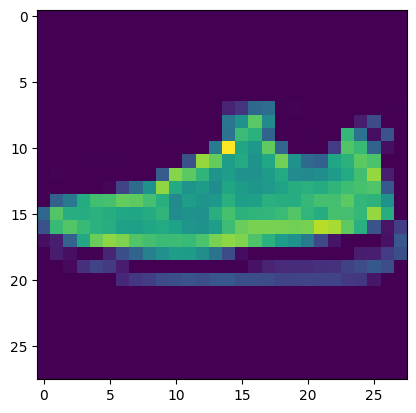

In [182]:
im_tensor = x[2].reshape(1, 28, 28).squeeze()
plt.imshow(im_tensor)

In [187]:
import fastcore.all as fc
fc.hasattrs

<function fastcore.basics.hasattrs(o, attrs)>

In [194]:
im_tensor.device

device(type='cpu')

In [192]:
help(fc.hasattrs)

Help on function hasattrs in module fastcore.basics:

hasattrs(o, attrs)
    Test whether `o` contains all `attrs`



In [ ]:
im_tensor.to('cpu')

In [201]:
def test(a, **kwargs):
  st()
  print(args, kwargs)

In [202]:
test(0, b= 1, c = 3, d = 4, e = 5)

> <ipython-input-201-373aa6e585b9>(3)test()
      1 def test(a, **kwargs):
      2   st()
----> 3   print(args, kwargs)

ipdb> args
a = 0
kwargs = {'b': 1, 'c': 3, 'd': 4, 'e': 5}
ipdb> kwargs
{'b': 1, 'c': 3, 'd': 4, 'e': 5}
ipdb> exit


In [250]:
def show_image(im, ax = None, figsize = (3, 3), title = None, **kwargs):

  # convert it to numpy
  # im = im.detach().to('cpu')
  # st()
  # im.squeeze()
  im = im.numpy()
  # create subplots
  if not ax: _, ax = plt.subplots(1, 1, figsize = figsize)
  ax.imshow(im, **kwargs)
  if title: ax.set_title(title)
  ax.axis('off')
  return ax

<Axes: >

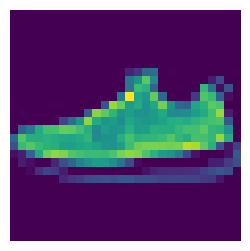

In [251]:
show_image(im_tensor)

In [252]:
import math

In [259]:
def get_grid(n_images, n_rows = None, n_cols = None, **kwargs):

  if n_rows and n_cols: nr, nc = n_rows, n_cols
  elif n_rows and not n_cols: nr, nc = nr, math.ceil(n_images/n_rows)
  elif n_cols and not n_rows: nr, nc = math.ceil(n_images/n_cols), n_cols
  else: nr, nc = math.ceil(n_images/4), 4
  fig, axs = plt.subplots(nr, nc, **kwargs)
  if nr*nc == 1: axs = [axs]
  for i in range(n_images, nr*nc): axs.flat[i].set_axis_off()
  return fig, axs.flatten()

In [260]:
images = x[:10]

In [261]:
images.shape

torch.Size([10, 1, 784])

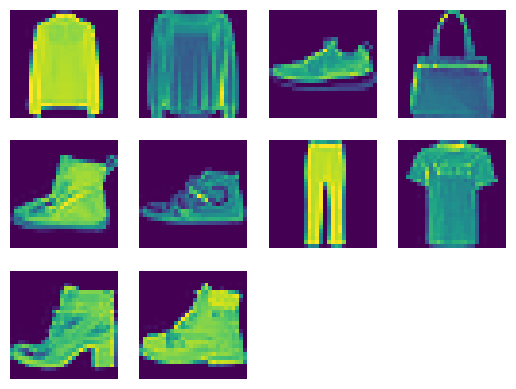

In [262]:
fig, axs = get_grid(images.shape[0])
for i in range(images.shape[0]):
  im = images[i].reshape([1, 28, 28]).squeeze()
  show_image(im, ax = axs[i])

In [263]:
x.shape

torch.Size([16, 1, 784])

In [ ]:
!pip install nbdev

# Callbacks

In [267]:
from time import sleep

In [268]:
sleep(3)

In [274]:
def get_cubes(n):
  for i in range(n):
    yield i**3

In [275]:
[i for i in get_cubes(4)]

[0, 1, 8, 27]

In [276]:
(i for i in range(3) if i%1 == 0)

<generator object <genexpr> at 0x79ae7857d7e0>

In [281]:
def get_primes(s, e):
    for i in range(s, e+1):
      is_prime = True
      for j in range(2, i):
        if (i%j) == 0:
          is_prime = False

      if is_prime:
        yield i


In [283]:
[i for i in get_primes(10, 19)]

[11, 13, 17, 19]

In [284]:
def fibbanocci():
    s1 = 1
    s2 = 2
    while True:
      next = s1 + s2
      s1, s2 = s2, next
      yield next

In [285]:
f = []
for i in fibbanocci():
  if (i > 100):
    break
  f.append(i)

In [286]:
f

[3, 5, 8, 13, 21, 34, 55, 89]

In [ ]:
def permutations(lis):
